# Dense neural network for classification

Required imports

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

df = pd.read_csv('dense-network/train.csv')

Using TensorFlow backend.


In [10]:
for el in df['22'].unique():
    df['22_' + str(el)] = 0
    df['22_' + str(el)][df['22'] == el] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '23', '24', '25',
       '26', '27', '28', '29', 'label', '22_3', '22_1', '22_0', '22_2'],
      dtype='object')

In [34]:
from sklearn.linear_model import LogisticRegression

my_df = df#df[['22_3', '22_1', '22_0', '22_2', 'label']]

my_X_train, my_X_test, my_y_train, my_y_test = train_test_split(my_df.drop('label', axis=1), df.label, train_size=0.7)

clf = LogisticRegression().fit(my_X_train, my_y_train)

pred = clf.predict(my_X_test) > 0.5
print(classification_report(my_y_test, pred, digits=5))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0    0.76750   0.84443   0.80413     34487
           1    0.63145   0.51027   0.56443     18014

    accuracy                        0.72978     52501
   macro avg    0.69947   0.67735   0.68428     52501
weighted avg    0.72082   0.72978   0.72188     52501



In [16]:
df.drop('22', axis=1, inplace=True)

In [4]:
df.shape

(175000, 31)

In [19]:
for i in range(30):
    if i == 22:
        continue
    df[str(i)][df[str(i)] == -999.00] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Split into train and test:

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,label,22_3,22_1,22_0,22_2
0,0.000,94.267,56.592,44.055,2.474,204.589,0.749,1.381,18.238,231.606,...,-0.572,43.346,2.747,2.699,142.992,0,1,0,0,0
1,175.895,8.281,96.004,26.597,0.000,0.000,0.000,2.957,4.658,131.113,...,2.186,0.000,0.000,0.000,30.306,1,0,1,0,0
2,108.990,11.094,67.990,41.397,0.000,0.000,0.000,3.013,2.026,111.415,...,1.502,0.000,0.000,0.000,43.309,1,0,1,0,0
3,131.516,46.504,89.693,8.039,0.000,0.000,0.000,3.153,8.039,87.773,...,0.000,0.000,0.000,0.000,0.000,1,0,0,1,0
4,0.000,71.995,73.582,1.615,0.000,0.000,0.000,2.231,1.615,77.546,...,0.000,0.000,0.000,0.000,0.000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,106.766,87.758,77.958,55.630,0.000,0.000,0.000,2.213,51.156,120.220,...,-0.931,0.000,0.000,0.000,31.931,0,0,1,0,0
174996,101.316,55.334,73.367,35.873,1.700,177.256,5.041,2.920,0.552,211.477,...,-0.008,48.705,1.551,-2.946,131.404,0,0,0,0,1
174997,106.724,9.824,67.347,40.528,0.000,0.000,0.000,2.519,27.190,105.498,...,1.247,0.000,0.000,0.000,35.725,1,0,1,0,0
174998,234.697,65.964,183.679,21.442,0.000,0.000,0.000,3.392,21.442,128.567,...,0.000,0.000,0.000,0.000,-0.000,0,0,0,1,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df.label, train_size=0.7)

Model architecture

In [38]:
model = Sequential([
    Dense(100, input_shape=(X_train.shape[1],)),     
    BatchNormalization(),
    Activation('relu'),

    Dense(100),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(100),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(100),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               3400      
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)               400       
_________________________________________________________________
activation_5 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_6 (Batch (None, 100)               400       
_________________________________________________________________
activation_6 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)              

Set optimizer and loss

In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Run model fit

In [41]:
history = model.fit(X_train.values, y_train, epochs=60, batch_size=64, validation_split=0.2)

Train on 97999 samples, validate on 24500 samples
Epoch 1/60
97999/97999 [==============================] - 19s 195us/step - loss: 0.3887 - accuracy: 0.8233 - val_loss: 0.3845 - val_accuracy: 0.8255
Epoch 2/60
97999/97999 [==============================] - 18s 187us/step - loss: 0.3874 - accuracy: 0.8254 - val_loss: 0.3749 - val_accuracy: 0.8303
Epoch 3/60
97999/97999 [==============================] - 20s 202us/step - loss: 0.3841 - accuracy: 0.8264 - val_loss: 0.3784 - val_accuracy: 0.8280
Epoch 4/60
97999/97999 [==============================] - 18s 185us/step - loss: 0.3830 - accuracy: 0.8263 - val_loss: 0.3782 - val_accuracy: 0.8305
Epoch 5/60
97999/97999 [==============================] - 20s 209us/step - loss: 0.3805 - accuracy: 0.8282 - val_loss: 0.3738 - val_accuracy: 0.8308
Epoch 6/60
97999/97999 [==============================] - 19s 198us/step - loss: 0.3782 - accuracy: 0.8294 - val_loss: 0.3768 - val_accuracy: 0.8304
Epoch 7/60
97999/97999 [==============================] 

Loss visualization

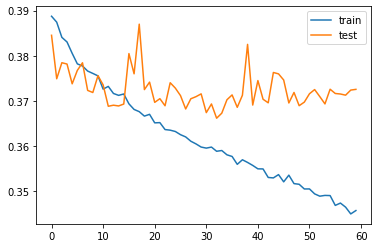

In [42]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

Metrics visualization

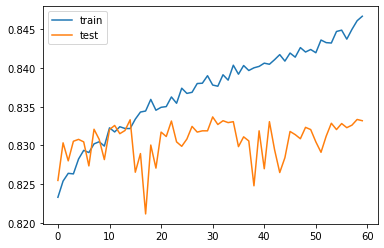

In [43]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

Classification report

In [44]:
pred = model.predict(X_test) > 0.5
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.86313   0.89330   0.87796     34443
           1    0.78195   0.72982   0.75498     18058

    accuracy                        0.83707     52501
   macro avg    0.82254   0.81156   0.81647     52501
weighted avg    0.83521   0.83707   0.83566     52501



Done!

In [49]:
test_df = pd.read_csv('dense-network/test.csv')

for el in test_df['22'].unique():
    test_df['22_' + str(el)] = 0
    test_df['22_' + str(el)][test_df['22'] == el] = 1

test_df.drop('22', axis=1, inplace=True)
for i in range(30):
    if i == 22:
        continue
    test_df[str(i)][test_df[str(i)] == -999.00] = 0
    
pred = model.predict(test_df) > 0.5
#print(classification_report(y_test, pred, digits=5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [52]:
pred.shape

(75000, 1)

In [58]:
pd.DataFrame({'Id': list(range(test_df.shape[0])), 'Predicted': pred[:, 0].astype(np.int32)}).to_csv('pred.csv', index=False)

In [56]:
pd.DataFrame.to_csv?